#神经网络简介
目前最广泛使用的定义是Kohonen于1988年的描述，神经网络是由具有适应性的简单单元组成的广泛并行互连的网络，它的组织能够模拟生物神经系统对真实世界物体所做出的交互反应。

## 概述
在生物神经网络中，每个神经元与其他神经元相连，当它兴奋时，就会向相连的神经元发送化学物质，从而改变这些神经元内的电位；如果某神经元的电位超过了一个阈值，那么它就会激活，即兴奋起来并向其他神经元发送化学物质。

在深度学习中也借鉴了这样的结构，`每一个神经元`（上面说到的简单单元，节点Node）`接受输入x`，通过`带权重w`的连接进行传递，将`总输入信号与神经元的阈值`进行比较，最后通过`激活函数`处理确定是否激活，并将激活后的`计算结果y输出`，而我们所说的训练，所`训练的就是这里面的权重w`。

[参考](http://www.dkriesel.com/en/science/neural_networks)

每一个神经元的结构如下：
![](6.png)

[来源](https://becominghuman.ai/from-perceptron-to-deep-neural-nets-504b8ff616e)





## 神经网络的表示
我们可以将神经元拼接起来，两层神经元，即`输入层+输出层(M-P神经元)`，构成`感知机`。
而多层功能神经元相连构成神经网络，`输入层与输出层之间`的所有层神经元，称为`隐藏层`：

![](https://pic1.zhimg.com/v2-777808fc5b00e7727df4dc835c1fc44f_1440w.jpg?source=172ae18b)

如上图所示，输入层和输出层只有一个，中间的`隐藏层可以有很多层`（输出层也可以多个，例如经典的GoogleNet，后面会详细介绍）

## 激活函数
介绍神经网络的时候已经说到，神经元会对化学物质的刺激进行，当达到一定程度的时候，神经元才会兴奋，并向其他神经元发送信息。神经网络中的`激活函数`就是用来判断我们所计算的信息是否达到了往后面传输的条件。(其实激活函数就是要引入非线性的因素)

### 为什么激活函数都是非线性的
在神经网络的计算过程中，每层都相当于矩阵相乘，无论神经网络有多少层输出都是输入的线性组合，就算我们有几千层的计算，无非还是个矩阵相乘，和一层矩阵相乘所获得的信息差距不大，所以需要`激活函数来引入非线性因素`，使得神经网络可以任意逼近任何非线性函数，这样神经网络就`可以应用到`众多的`非线性模型`中，`增加了神经网络模型泛化的特性`。

早期研究神经网络主要采用`sigmoid函数`或者`tanh函数`，输出有界，很容易充当下一层的输入。 
近些年`Relu函数`及其改进型（如`Leaky-ReLU、P-ReLU、R-ReLU`等），由于计算简单、效果好所以在多层神经网络中应用比较多。

下面来总结下较常见的激活函数：

In [1]:
# 初始化一些信息
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
x= torch.linspace(-10,10,60)

### sigmoid 函数
$a=\frac{1}{1+e^{-z}}$ 导数 ：$a^\prime =a(1 - a)$

在sigmoid函数中我们可以看到，其`输出是在(0,1)`这个开区间，它能够把输入的连续实值变换为0和1之间的输出，如果是`非常大的负数`，那么`输出就是0`；如果是`非常大的正数输出就是1`，起到了抑制的作用。






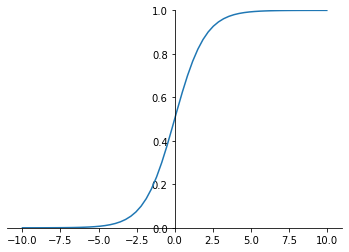

In [2]:
## 这段代码是为了画出sigmoid的函数图像，没什么用，实际上这些activative function都被包含在torch.nn.Module模块中，直接调用
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data', 0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data', 0))
plt.ylim((0, 1))
sigmod=torch.sigmoid(x)
plt.plot(x.numpy(),sigmod.numpy())

但是`sigmod`由于`需要指数运算`（这个对于计算机来说是比较`慢`，相比relu），再加上函数`输出不是以0为中心`的（这样会使权重更新效率降低），当`输入稍微远离了坐标原点`，函数的`梯度就变得很小`了（几乎为零）。

在神经网络反向传播的过程中不利于权重的优化，这个问题叫做`梯度消失`。这些不足，所以现在使用到sigmod基本很少了，基本上只有在`做二元分类（0，1）(logistic regression)`时的`输出层`才会使用。

### tanh 函数
$a=\frac{e^z-e^{-z}}{e^z+e^{-z}}$ 导数：$a^\prime =1 - a^2$ 

tanh是双曲正切函数，输出区间是在(-1,1)之间，而且整个函数是以0为中心的

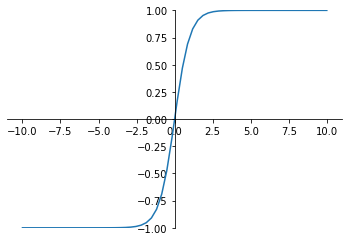

In [3]:
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data', 0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data', 0))
plt.ylim((-1, 1))
tanh=torch.tanh(x)
plt.plot(x.numpy(),tanh.numpy())

与sigmoid函数类似，当输入稍微远离了坐标原点，梯度还是会很小`（梯度消失问题仍然存在）`，但是好在tanh是以0为中心点，如果使用`tanh作为激活函数`，还能起到`归一化（均值为0）的效果`。

一般二分类问题中，隐藏层用tanh函数，输出层用sigmod函数，但是随着Relu的出现`所有的隐藏层基本上都使用relu`来作为激活函数了

### ReLU 函数
Relu（Rectified Linear Units）修正线性单元

$a=max(0,z)$ 

导数大于0时1，小于0时0。

也就是说：

`z>0`时，`梯度始终为1`，从而`提高`神经网络基于梯度算法的`运算速度`。

当z<0时，梯度一直为0。

ReLU函数只有线性关系（只需要判断输入是否大于0）不管是前向传播还是反向传播，都比sigmod和tanh要快很多，

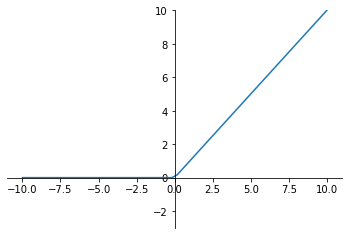

In [4]:
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data', 0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data', 0))
plt.ylim((-3, 10))
relu=F.relu(x)
plt.plot(x.numpy(),relu.numpy())

### Dead ReLU
当`输入是负数`的时候，`ReLU是不被激活`的，这就表明一旦输入到了负数，ReLU就会死掉。但是到了`反向传播过程中`，输入负数，`梯度就会完全到0`，这个和sigmod函数、tanh函数有一样的问题。 

但是实际的运用中，该缺陷的影响不是很大。

### Leaky Relu 函数
为了解决relu函数`z<0时`的问题出现了`Leaky ReLU函数`，该函数保证在z<0的时候，梯度仍然不为0。

ReLU的前半段设为αz而非0，通常α=0.01 $ a=max(\alpha z,z)$

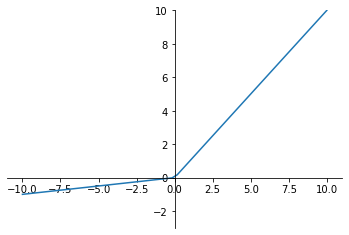

In [5]:
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data', 0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data', 0))
plt.ylim((-3, 10))
l_relu=F.leaky_relu(x,0.1) # 这里的0.1是为了方便展示，理论上应为0.01甚至更小的值
plt.plot(x.numpy(),l_relu.numpy())

理论上来讲，`Leaky ReLU有ReLU的所有优点`，但是在实际操作当中，并`没有完全证明Leaky ReLU总是好于ReLU`。

`ReLU目前仍是最常用的activation function`，在隐藏层中推荐`优先尝试`！

## 深入理解前向传播和反向传播
在最后我们再详细说下神经网络中的`前向传播`和`反向传播`，这里继续使用吴恩达老师的板书

![](https://img1.baidu.com/it/u=610582137,107887114&fm=26&fmt=auto)

### 正向传播
对于一个神经网络来说，把`输入特征`$a^{[0]}$这个输入值就是我们的输入$x$，放入第一层并计算第一层的激活函数，用$a^{[1]}$表示，本层中训练的结果用$W^{[1]}$和$b^{[l]}$来表示，这两个值与，`计算的结果`$z^{[1]}$值都需要进行缓存，而`计算的结果`还需要`通过激活函数`生成激活后的$a^{[1]}$，即`第一层的输出值`，这个`值会作为第二层的输入`传到第二层，第二层里，需要用到$W^{[2]}$和$b^{[2]}$，计算结果为$z^{[2]}$，第二层的激活函数$a^{[2]}$。

后面几层以此类推，直到最后算出了$a^{[L]}$，第$L$层的最终输出值$\hat{y}$，即我们网络的`预测值(output)`。正向传播其实就是我们的输入$x$通过一系列的网络计算，得到$\hat{y}$的过程。

在这个过程里我们缓存的值，会在后面的反向传播中用到。


### 反向传播

![](https://gimg2.baidu.com/image_search/src=http%3A%2F%2Fimages2017.cnblogs.com%2Fblog%2F1251601%2F201710%2F1251601-20171013150004637-748281566.png&refer=http%3A%2F%2Fimages2017.cnblogs.com&app=2002&size=f9999,10000&q=a80&n=0&g=0n&fmt=jpeg?sec=1640139712&t=6e892ce474911f09de8001e22cb0631d)

对反向传播的步骤而言，就是对正向传播的一系列的反向迭代，通过`反向计算梯度`，来优化我们需要训练的$W$和$b$。
把${\delta}a^{[l]}$值进行求导得到${\delta}a^{[l-1]}$，以此类推，直到我们得到${\delta}a^{[2]}$和${\delta}a^{[1]}$。反向传播步骤中也会输出 ${\delta}W^{[l]}$和${\delta}b^{[l]}$。这一步我们已经得到了权重的变化量，下面我们要通过`学习率`来对训练的$W$和$b$进行更新，

(对每一个权重)

$W=W-\alpha{\delta}W $

$b=b-\alpha{\delta}b $

这样反向传播就就算是完成了